<a href="https://colab.research.google.com/github/AhmedWael2000/A-B-testingProj/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AlexNet

AlexNet is a convolutional neural network (CNN) architecture designed by Alex Krizhevsky and his colleagues in 2012, for the ImageNet Large Scale Visual Recognition Challenge.
It was the first fast GPU-implementation of a CNN to win an image recognition contest.
The network contained eight layers: the first five were convolutional layers, some of them followed by max-pooling layers, and the last three were fully connected layers. The depth of the network was essential for its high performance 1. It used the non-saturating ReLU activation function.


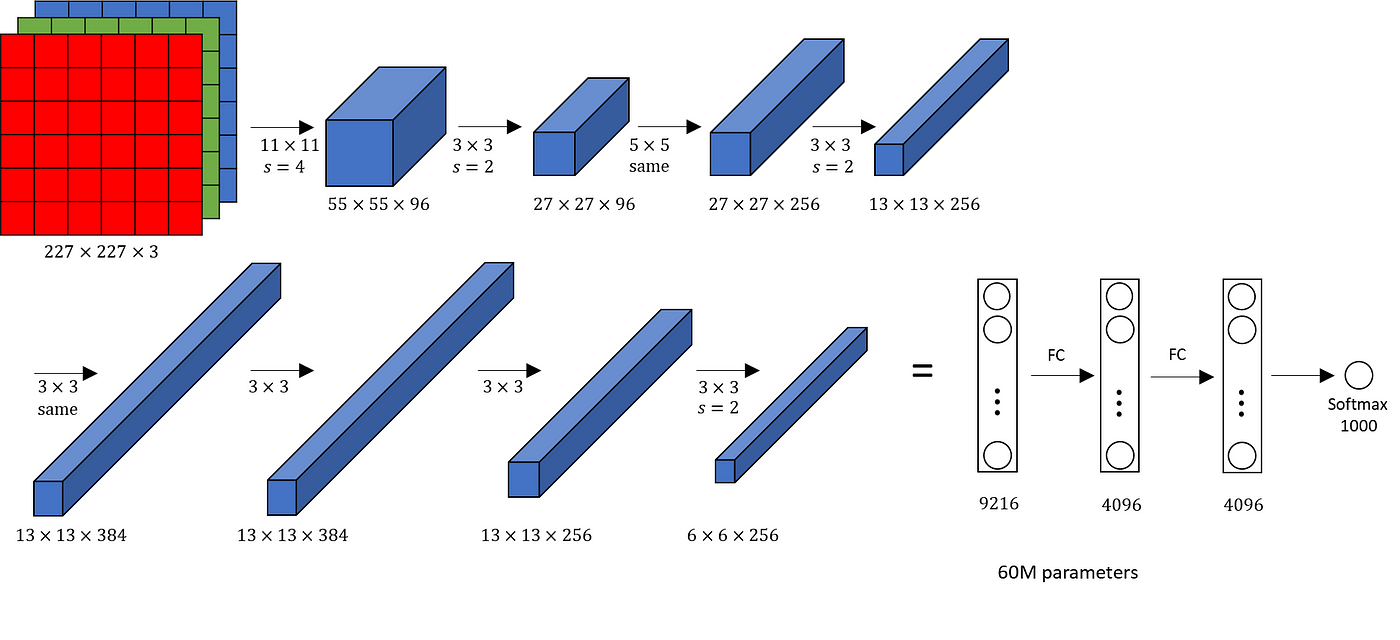

In [6]:
import torchvision
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from torch import nn
from torch.utils.data import DataLoader
from torchvision import models

In [3]:
device = ("cuda" if torch.cuda.is_available() else 'cpu')

# AlexNet for Cifar10

In [4]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
train_set = torchvision.datasets.CIFAR10(root="Cifar",train=True,transform=transform,download=True)
test_set = torchvision.datasets.CIFAR10(root="Cifar",train=False,transform=transform,download=True)

100%|██████████| 170498071/170498071 [00:04<00:00, 40445937.67it/s]


Extracting Cifar/cifar-10-python.tar.gz to Cifar
Files already downloaded and verified


In [ ]:
train_set[0][0].max(),train_set[0][0].min()

(tensor(2.3761), tensor(-1.8256))

In [5]:
train_loader = DataLoader(dataset=train_set,batch_size=100,shuffle=True)
test_loader = DataLoader(dataset = test_set, batch_size=100)

In [ ]:
alexnet = models.alexnet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 151MB/s]


In [ ]:
for param in alexnet.parameters():
  param.requires_grad=False
alexnet.classifier[6] = nn.Linear(4096,10)

In [ ]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(alexnet.parameters(),lr=0.001)

In [ ]:
len(test_loader)

100

In [12]:
def train(model, optimizer, criterion, epochs=2):

  device = ("cuda" if torch.cuda.is_available() else 'cpu')
  model.to(device)
  train_loss, val_loss = [],[]
  train_acc, val_acc = [],[]

  for epoch in range(epochs):
    total_train_loss = 0
    total_val_loss =0

    # training
    model.train()
    for i , (images,labels) in enumerate(train_loader):

      images = images.to(device)
      labels = labels.to(device)

      out = model(images)
      loss = criterion(out, labels)

      total_train_loss += loss.item()

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    total_train_loss /= (len(train_set))
    train_loss.append(total_train_loss)

    # validating
    n_samples =0
    n_correct=0
    model.eval()
    for i , (images,labels) in enumerate(test_loader):

      images = images.to(device)
      labels = labels.to(device)

      out = model(images)
      loss = criterion(out, labels)

      total_val_loss += loss.item()

      _, out = torch.max(out,1)
      n_correct += (out == labels).sum().item()
      n_samples += len(labels)
    acc = 100*n_correct/n_samples
    val_loss.append(total_val_loss/(len(test_set)))
    print(f'epoch: {epoch}, train Loss: {train_loss[-1]:0.4f}, val Loss: {val_loss[-1]:0.4f}, accuracy: {acc}')

  return train_loss, val_loss, model


In [ ]:
train_loss, val_loss, alexnet = train(alexnet, optimizer, criterion, epochs=10)

epoch: 0, train Loss: 0.0075, val Loss: 0.0056, accuracy: 80.22
epoch: 1, train Loss: 0.0064, val Loss: 0.0052, accuracy: 81.45
epoch: 2, train Loss: 0.0061, val Loss: 0.0052, accuracy: 81.47
epoch: 3, train Loss: 0.0061, val Loss: 0.0056, accuracy: 80.66
epoch: 4, train Loss: 0.0059, val Loss: 0.0056, accuracy: 80.38
epoch: 5, train Loss: 0.0059, val Loss: 0.0052, accuracy: 81.93
epoch: 6, train Loss: 0.0059, val Loss: 0.0052, accuracy: 81.72
epoch: 7, train Loss: 0.0058, val Loss: 0.0054, accuracy: 81.42
epoch: 8, train Loss: 0.0058, val Loss: 0.0051, accuracy: 82.08
epoch: 9, train Loss: 0.0057, val Loss: 0.0057, accuracy: 80.34


Confusion Matrix

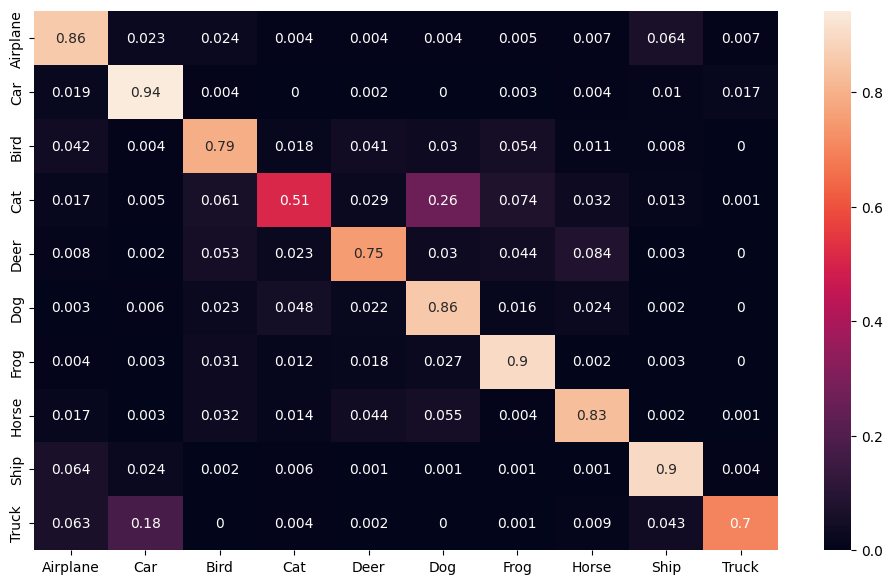

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

y_pred = []
y_true = []
device = ("cuda" if torch.cuda.is_available() else 'cpu')
for i , (inputs,labels) in enumerate(test_loader):
        inputs = inputs.to(device)
        labels= labels.to(device)
        output = alexnet(inputs)

        output = (torch.max(output, 1)[1]).cpu().numpy()
        y_pred.extend(output) # Save Prediction

        labels = labels.data.cpu().cpu().numpy()
        y_true.extend(labels) # Save Truth

# classes
classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

# confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')


# ResNet


In [14]:
resnet = models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
for param in resnet.parameters():
  param.requires_grad=False
resnet.fc = nn.Linear(512,10)

In [16]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [17]:
criterion = nn.CrossEntropyLoss()
resOptimizer = torch.optim.Adam(resnet.parameters(),lr=0.001)
train_loss, val_loss, alexnet = train(resnet, resOptimizer, criterion, epochs=10)

epoch: 0, train Loss: 0.0095, val Loss: 0.0073, accuracy: 75.37
epoch: 1, train Loss: 0.0070, val Loss: 0.0067, accuracy: 77.14
epoch: 2, train Loss: 0.0066, val Loss: 0.0065, accuracy: 77.48
epoch: 3, train Loss: 0.0064, val Loss: 0.0064, accuracy: 77.78
epoch: 4, train Loss: 0.0063, val Loss: 0.0064, accuracy: 77.96
epoch: 5, train Loss: 0.0062, val Loss: 0.0063, accuracy: 78.45
epoch: 6, train Loss: 0.0062, val Loss: 0.0063, accuracy: 78.47
epoch: 7, train Loss: 0.0061, val Loss: 0.0063, accuracy: 78.25
epoch: 8, train Loss: 0.0061, val Loss: 0.0064, accuracy: 78.2
epoch: 9, train Loss: 0.0061, val Loss: 0.0062, accuracy: 78.81


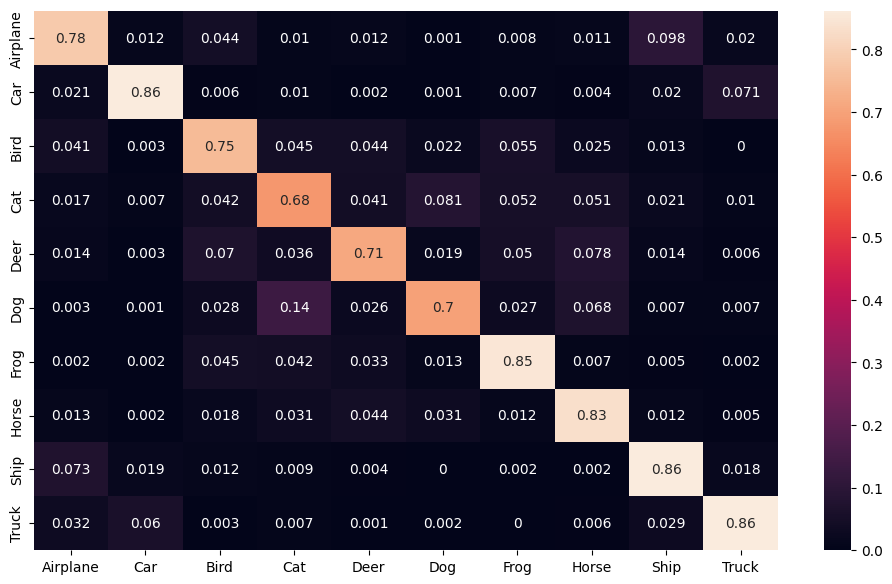

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

y_pred = []
y_true = []
for i , (inputs,labels) in enumerate(test_loader):
        inputs = inputs.to(device)
        labels= labels.to(device)
        output = resnet(inputs)

        output = (torch.max(output, 1)[1]).cpu().numpy()
        y_pred.extend(output) # Save Prediction

        labels = labels.data.cpu().cpu().numpy()
        y_true.extend(labels) # Save Truth

# classes
classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

# confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')
